<h1 style="color:darkmagenta; font-family:Cursive"><center><b>Employee Attrition for Healthcare

</center></h1> 

![ ](https://thumbs.dreamstime.com/z/lot-pills-blue-background-heart-shape-as-symbol-medical-treatment-healthy-heart-emergency-help-if-212881190.jpg)

<h2 style="color:MediumVioletRed; font-family:Cursive"><b>Goal of creating this Notebook🎯</h2>

1. Are there any missing values?
2. Are there any missing values?
3. Can we make feature engineering?
4. How does values effect on target values?

**Table of contents of this notebook:**

1. [Importing Necessary Libraries](#1)

2. [Loading The Data](#2)

3. [Missing Values And Outliers](#3)

4. [Exploratory Data Analysis](#4)

5. [Data Preprocessing](#5)

6. [Models](#6)

<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Importing Necessary Libraries</h1><a id = "1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')
colors = sns.color_palette("pastel")[0:5]

<h1  style="text-align: center" class="list-group-item list-group-item-action active">2.Loading The Data</h1><a id = "2"></a>

In [2]:
data = pd.read_csv('../input/employee-attrition-for-healthcare/watson_healthcare_modified.csv')
df = data.copy()

In [3]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [4]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : We look our values for which value is max and which value is min.We saw our values very clear.

<h1  style="text-align: center" class="list-group-item list-group-item-action active">3. Missing Values And Outliers</h1><a id = "3"></a>

In [5]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

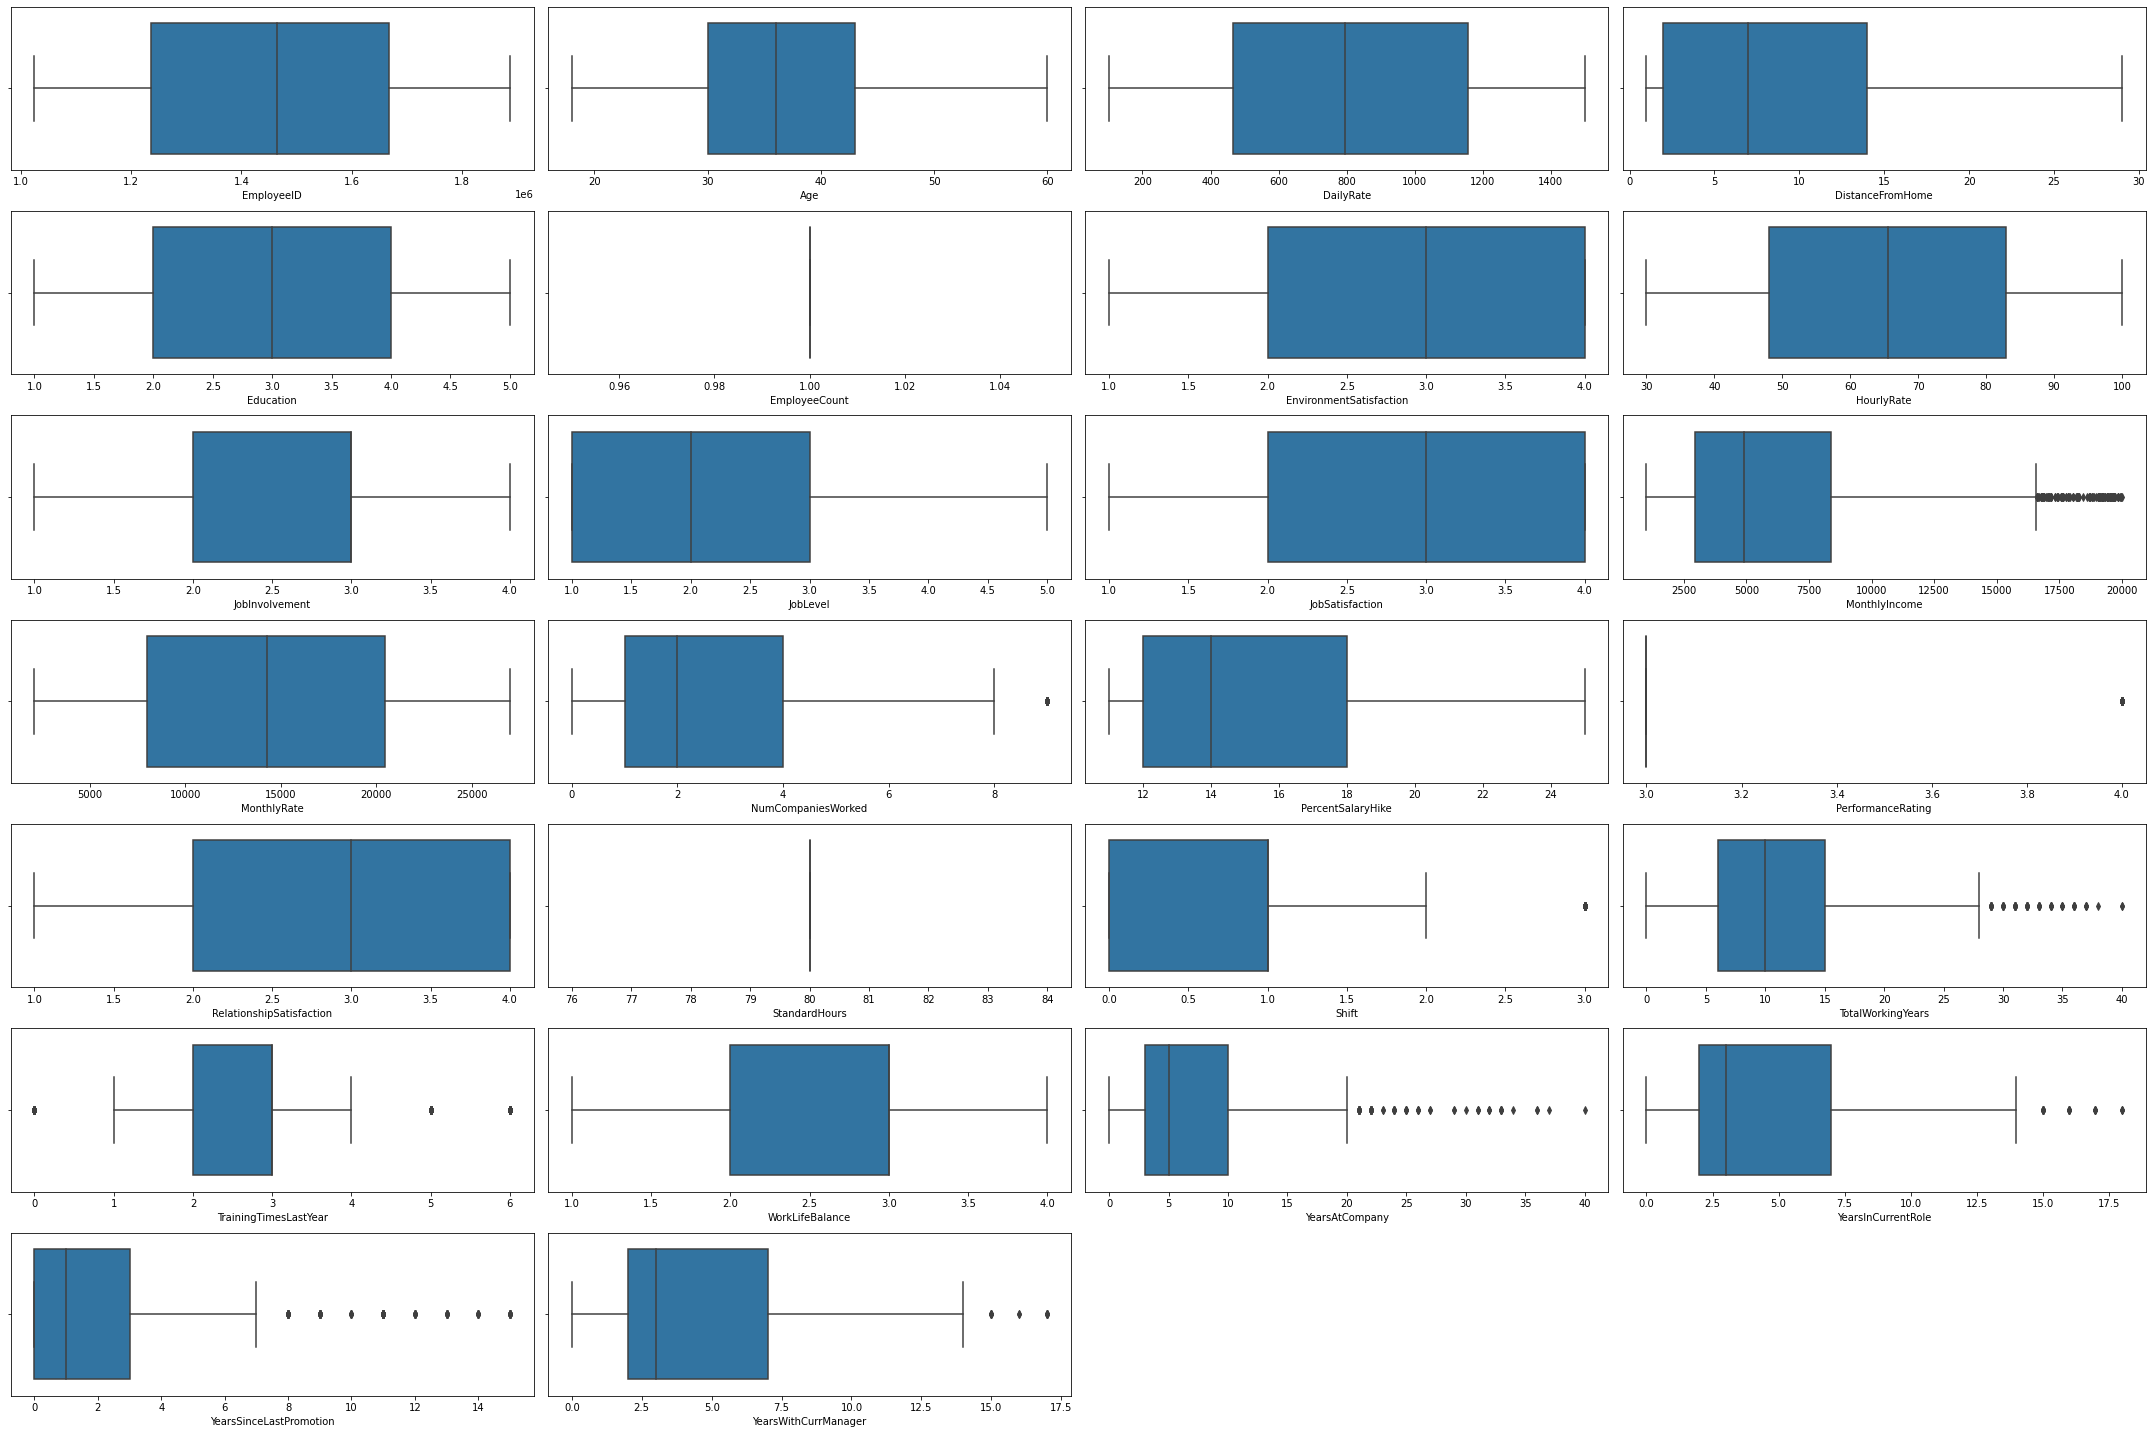

In [7]:
plt.figure(figsize=(30,20))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)
    

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : There is no missing values..I can not say that there is a outliers.May Some variables seem like outliers but they are not distant from 50% data.I decided spare any data.

In [8]:
num_col = num_col.drop("EmployeeID",axis = 1)

In [9]:
num_col = num_col.drop(["DailyRate","MonthlyIncome","MonthlyRate"],axis = 1)

<h1  style="text-align: center" class="list-group-item list-group-item-action active">4. Exploratory Data Analysis</h1><a id = "4"></a>

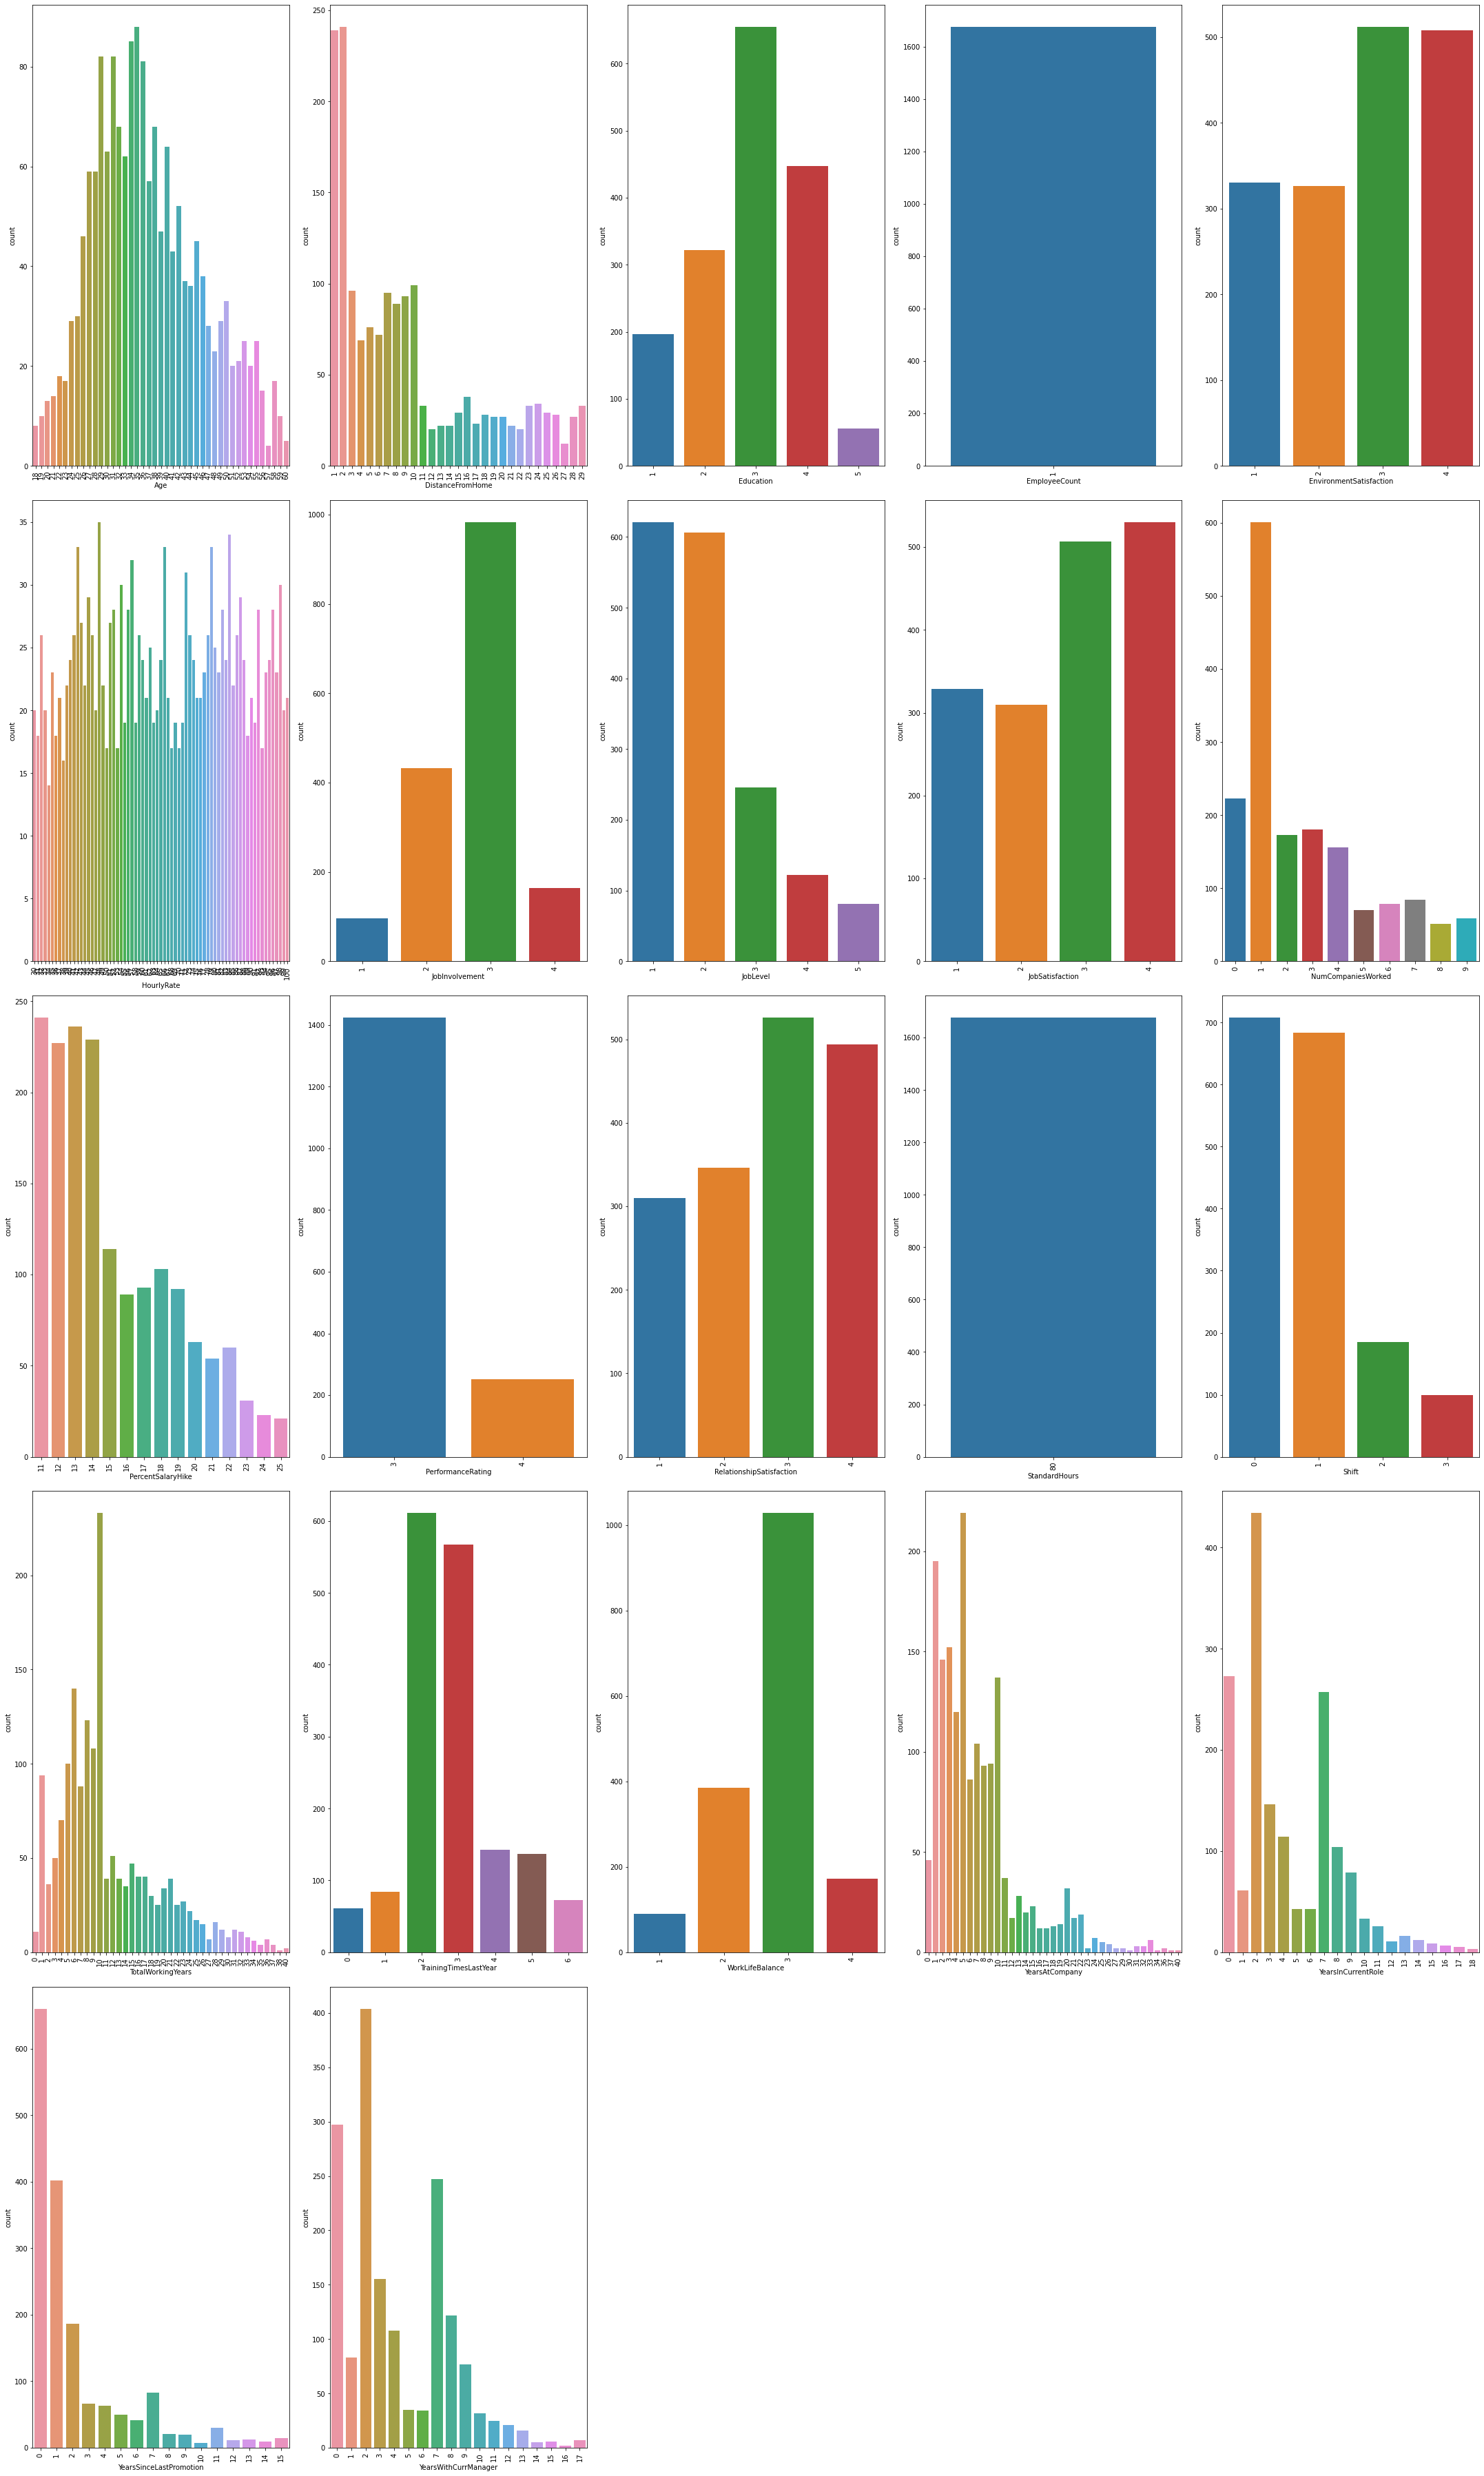

In [10]:
plt.figure(figsize=(30,50))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.countplot(data=num_col,x=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

**Some variables dominate its all data**

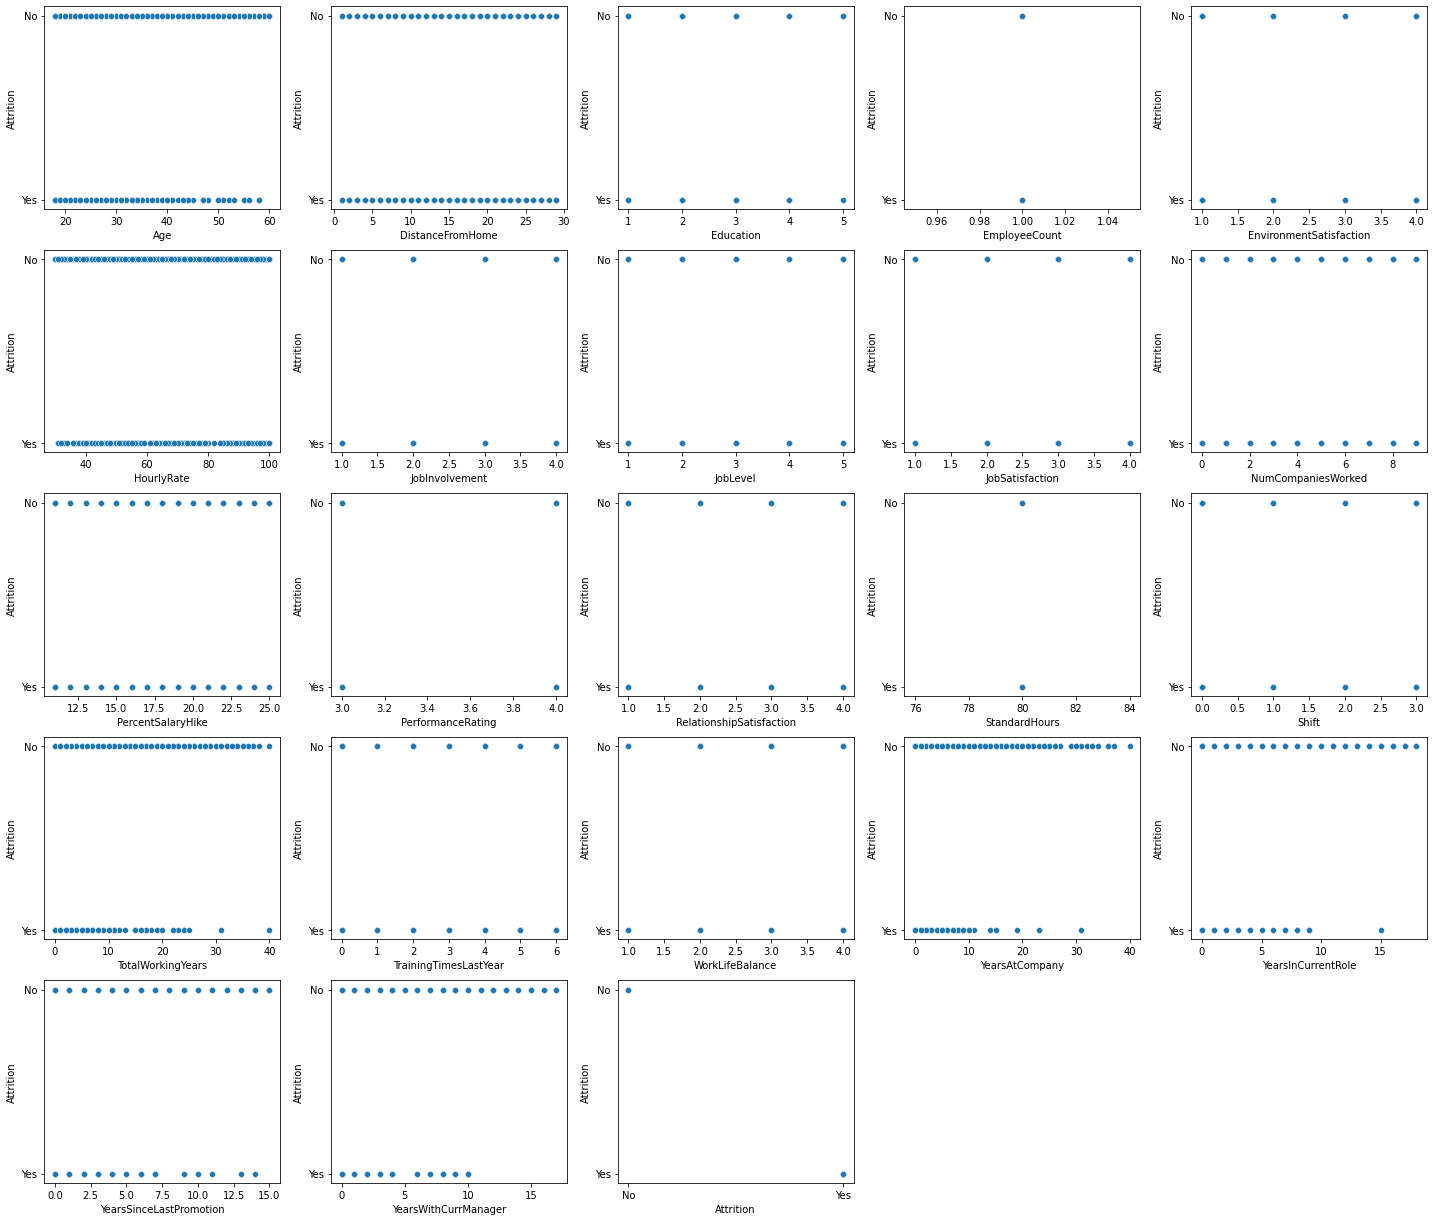

In [11]:
num_col["Attrition"] = df.Attrition
fig = plt.figure(figsize=(20,20))
for index in range(len(num_col.columns)):
    plt.subplot(6,5,index + 1)
    sns.scatterplot(x = num_col.iloc[:,index],y="Attrition",data = num_col)
    
fig.tight_layout(pad = 1.0)

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : There is no regression in this data.As we can see.

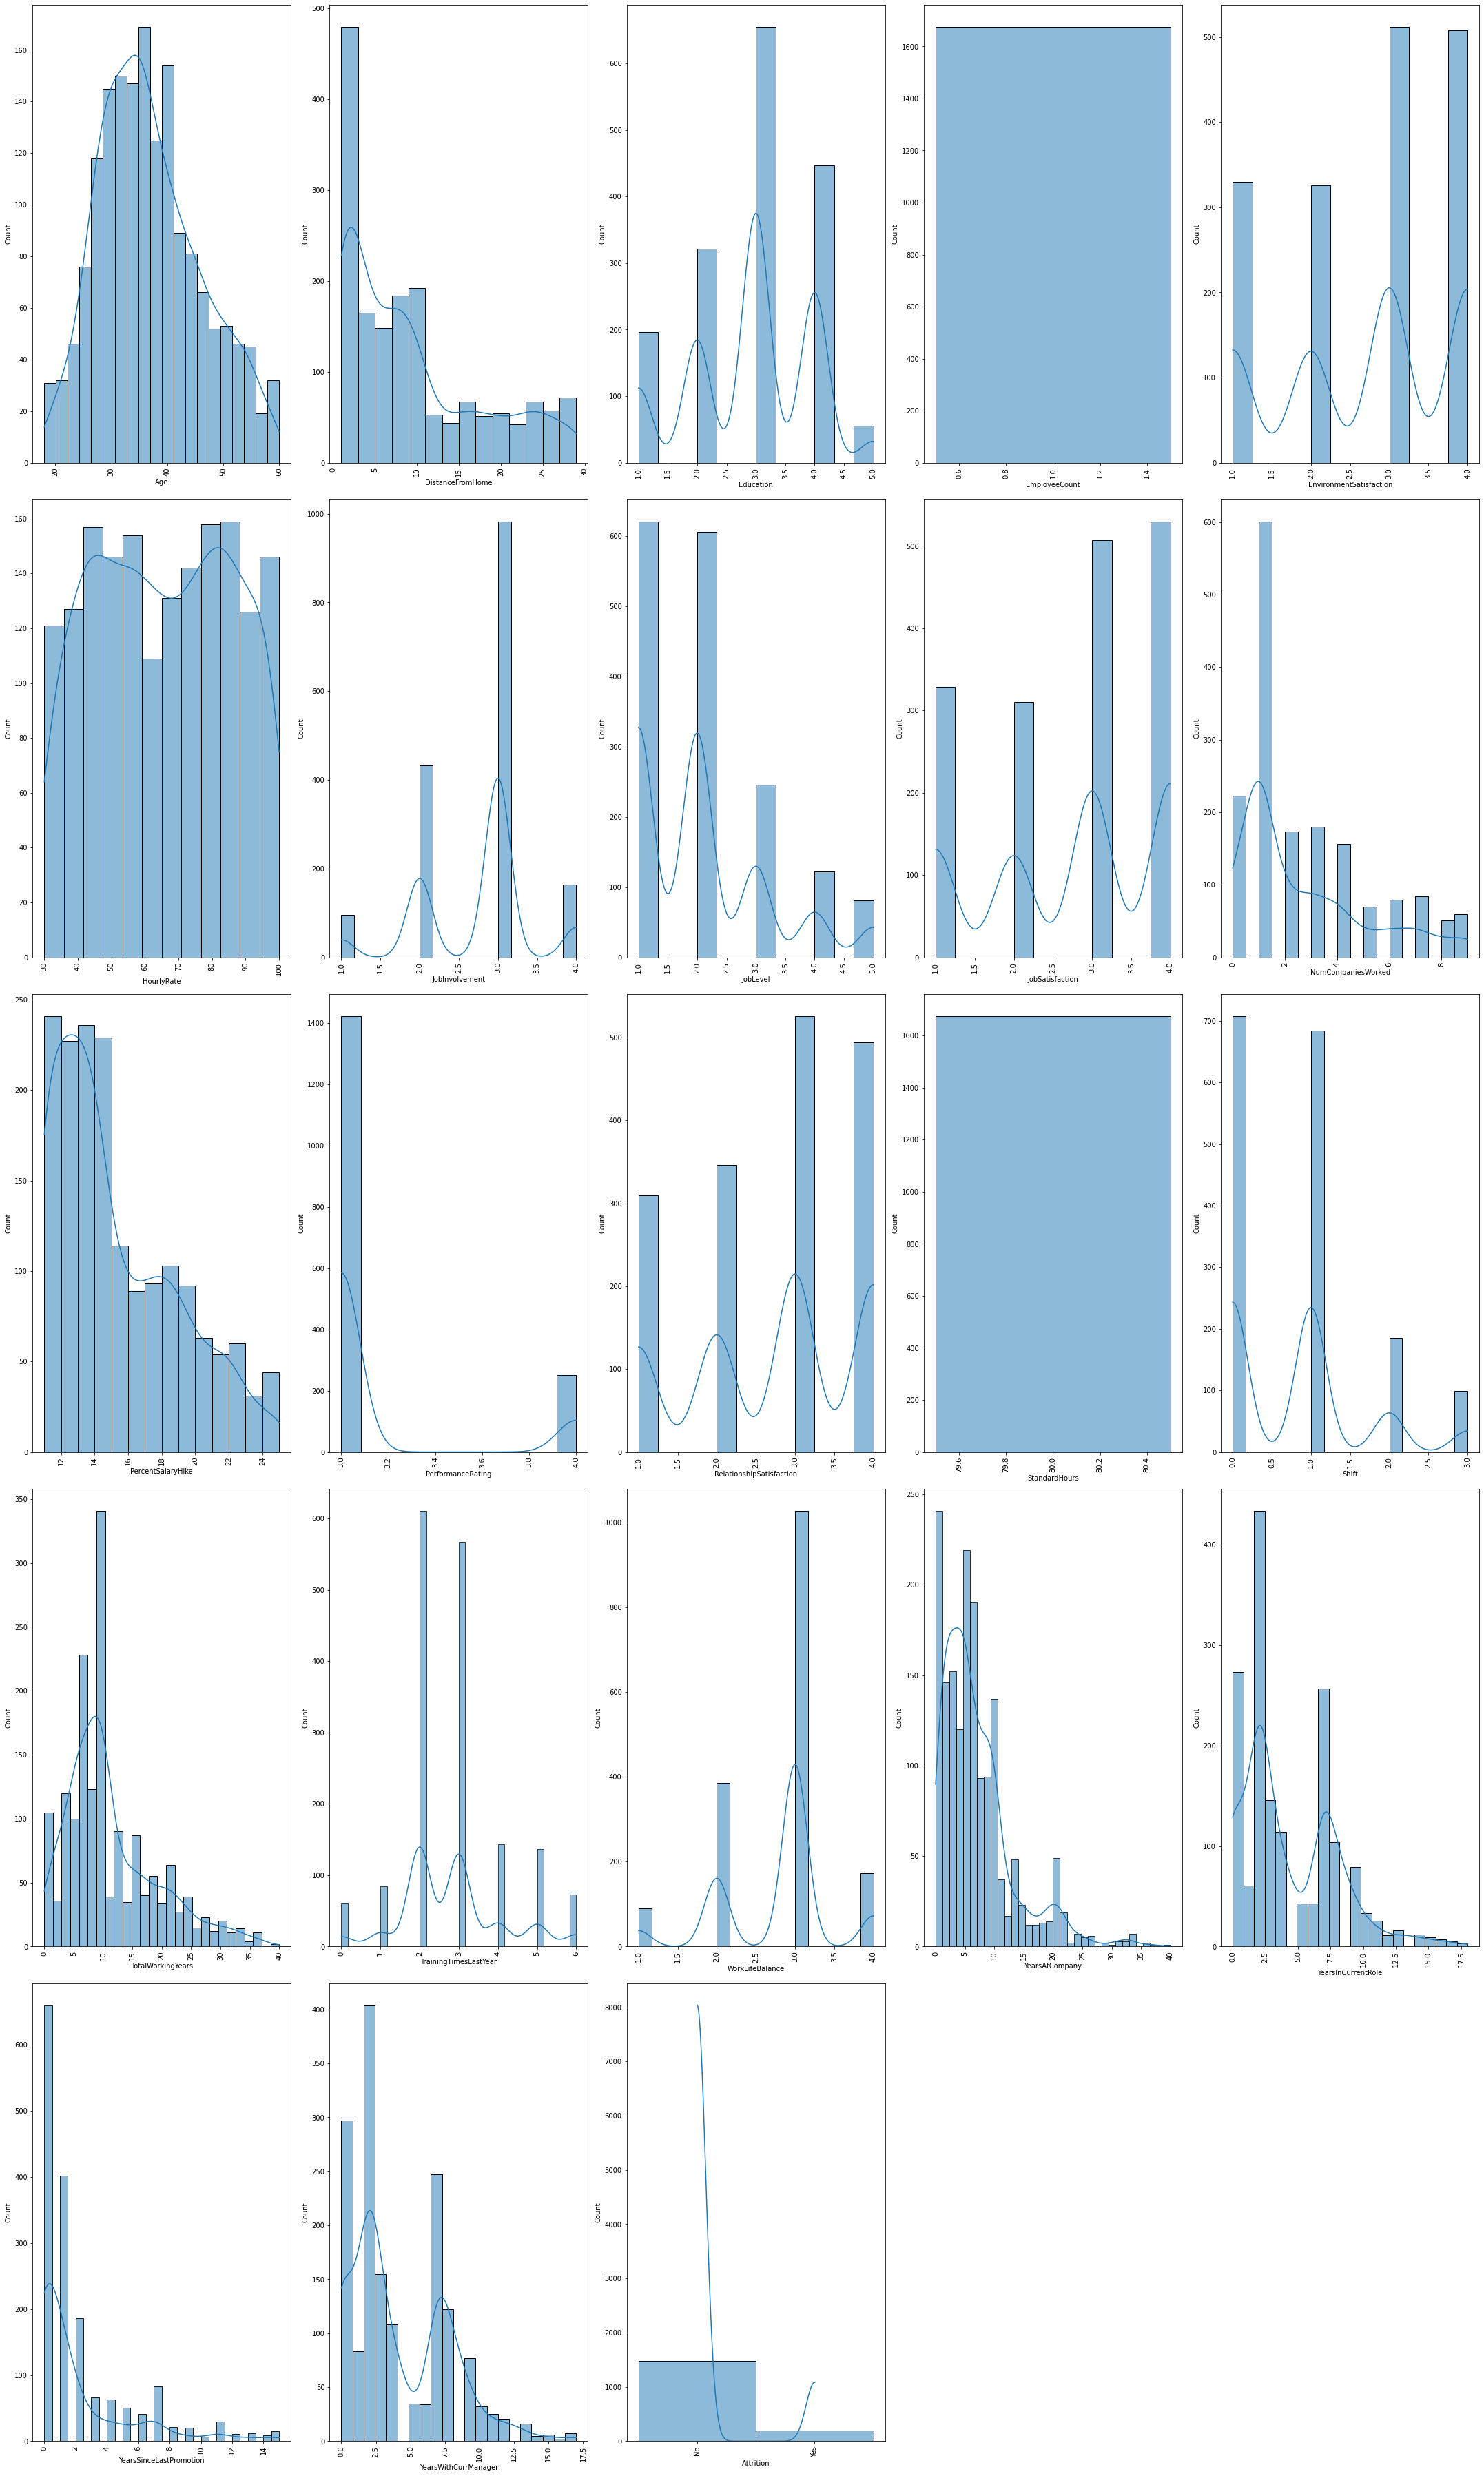

In [12]:
plt.figure(figsize=(30,50))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.histplot(data=num_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : EmployeeCount and StandartHours has one value.We should drop them because variables which have one value will not give us good information.

In [13]:
df.drop(["EmployeeID","EmployeeCount","StandardHours"],axis = 1,inplace = True)

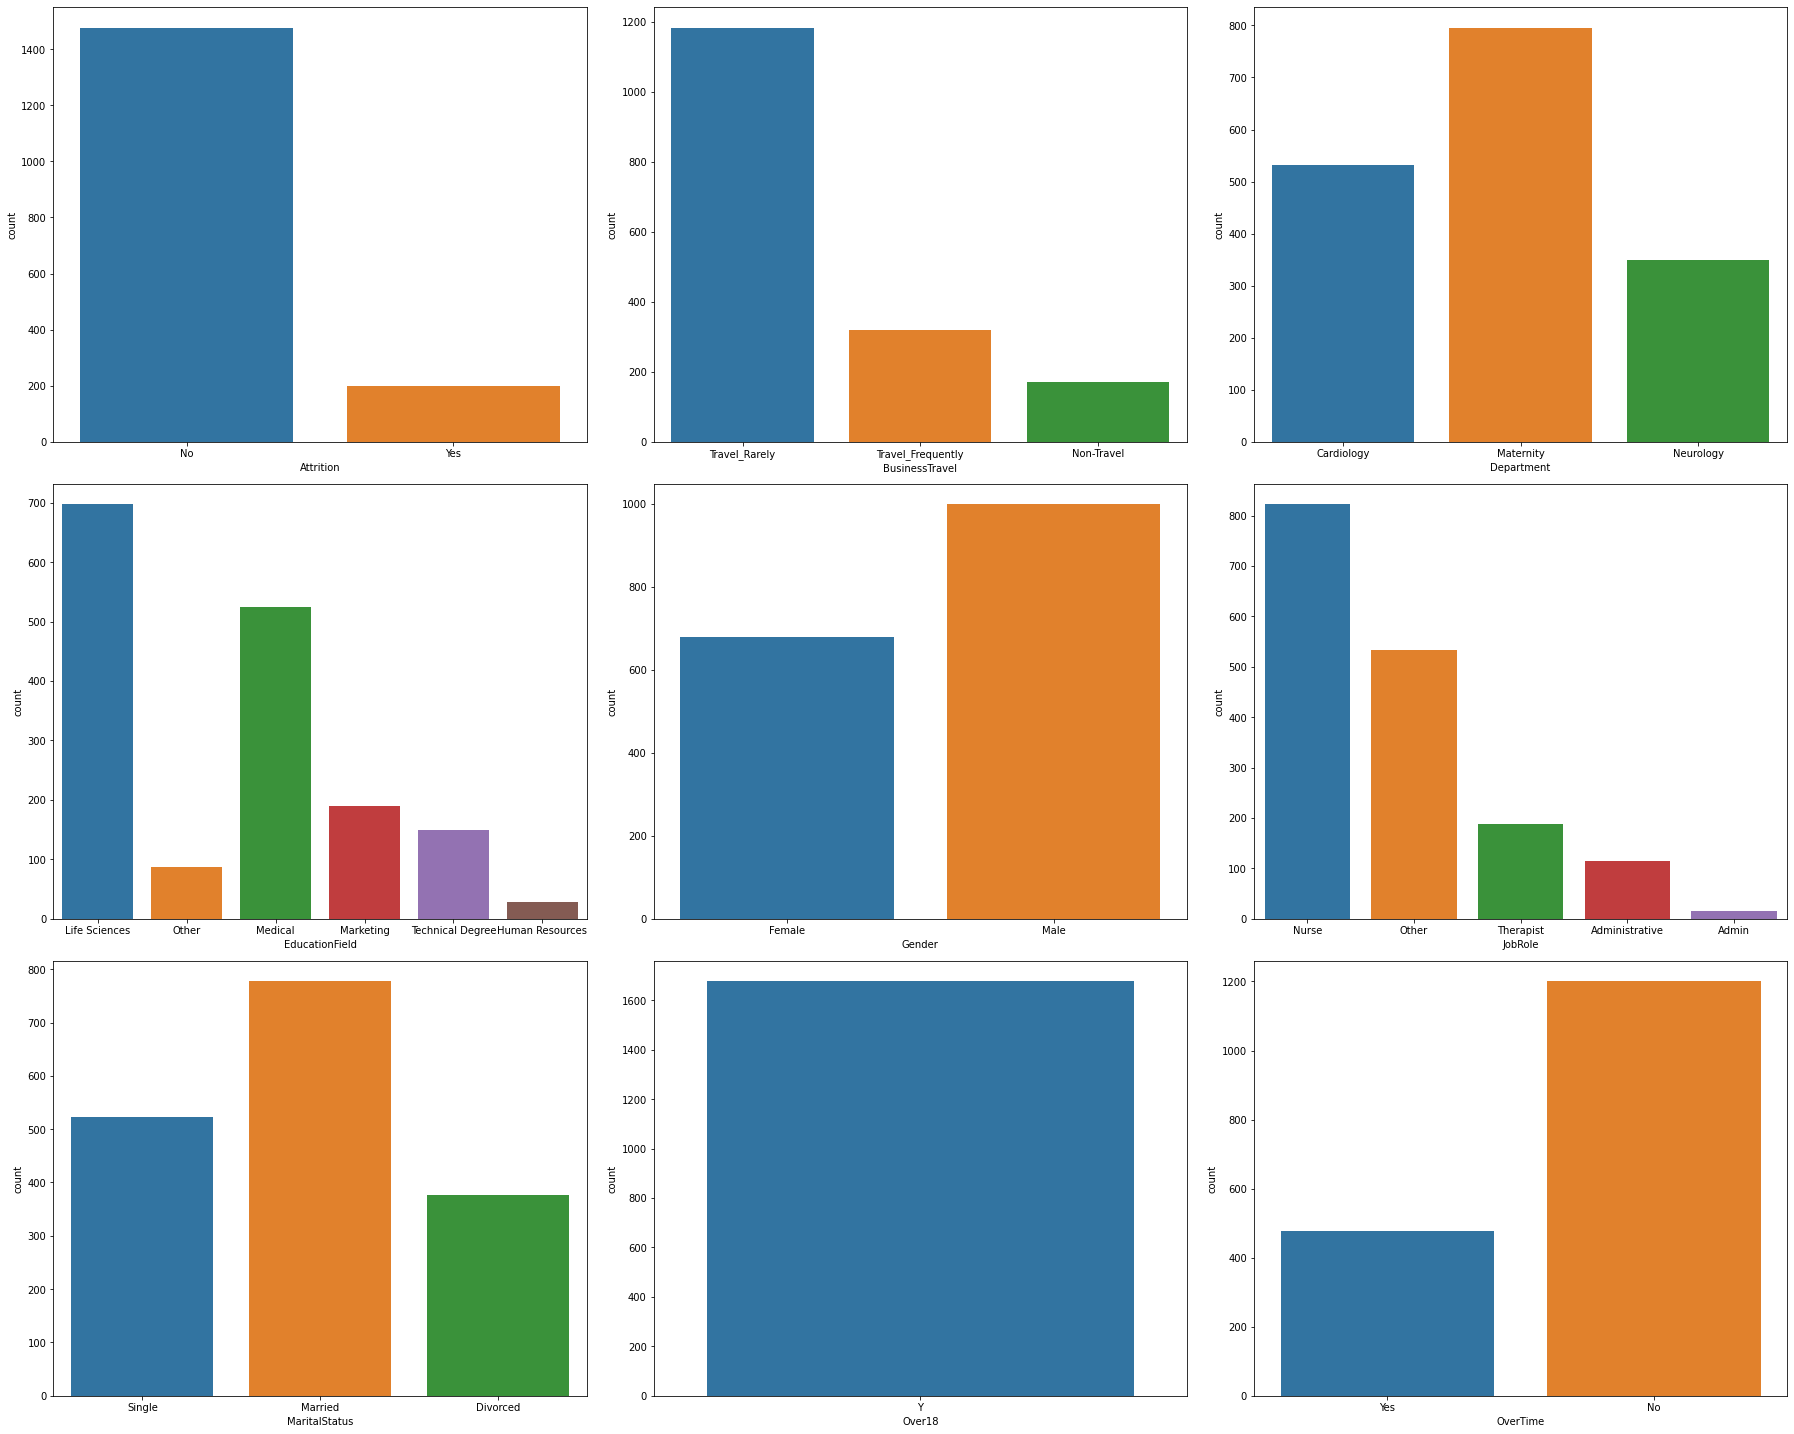

In [14]:
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_col):
    plt.subplot(3,3,index+1)
    sns.countplot(data=cat_col,x=column)
    
plt.tight_layout(pad = 1.0)
plt.show()

In [15]:
px.histogram(df,x="Department",histnorm="percent",text_auto=".2f",template="plotly_dark",
             title = "Percentage of Department Type")

In [16]:
px.histogram(df,x="Department",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of Department Type")

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : We observe that department's values distribution.There is a slightly difference that we can observe.

In [17]:
px.histogram(df,x="EducationField",histnorm="percent",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")

In [18]:
px.histogram(df,x="EducationField",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : We observe that department's values distribution.There is a slightly difference that we can observe.

In [19]:
px.histogram(df,x="JobRole",histnorm="percent",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")

In [20]:
px.histogram(df,x="JobRole",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : We observe that department's values distribution.There is a huge difference that we can observe.

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : Some of them influence data very highly.We want to show.

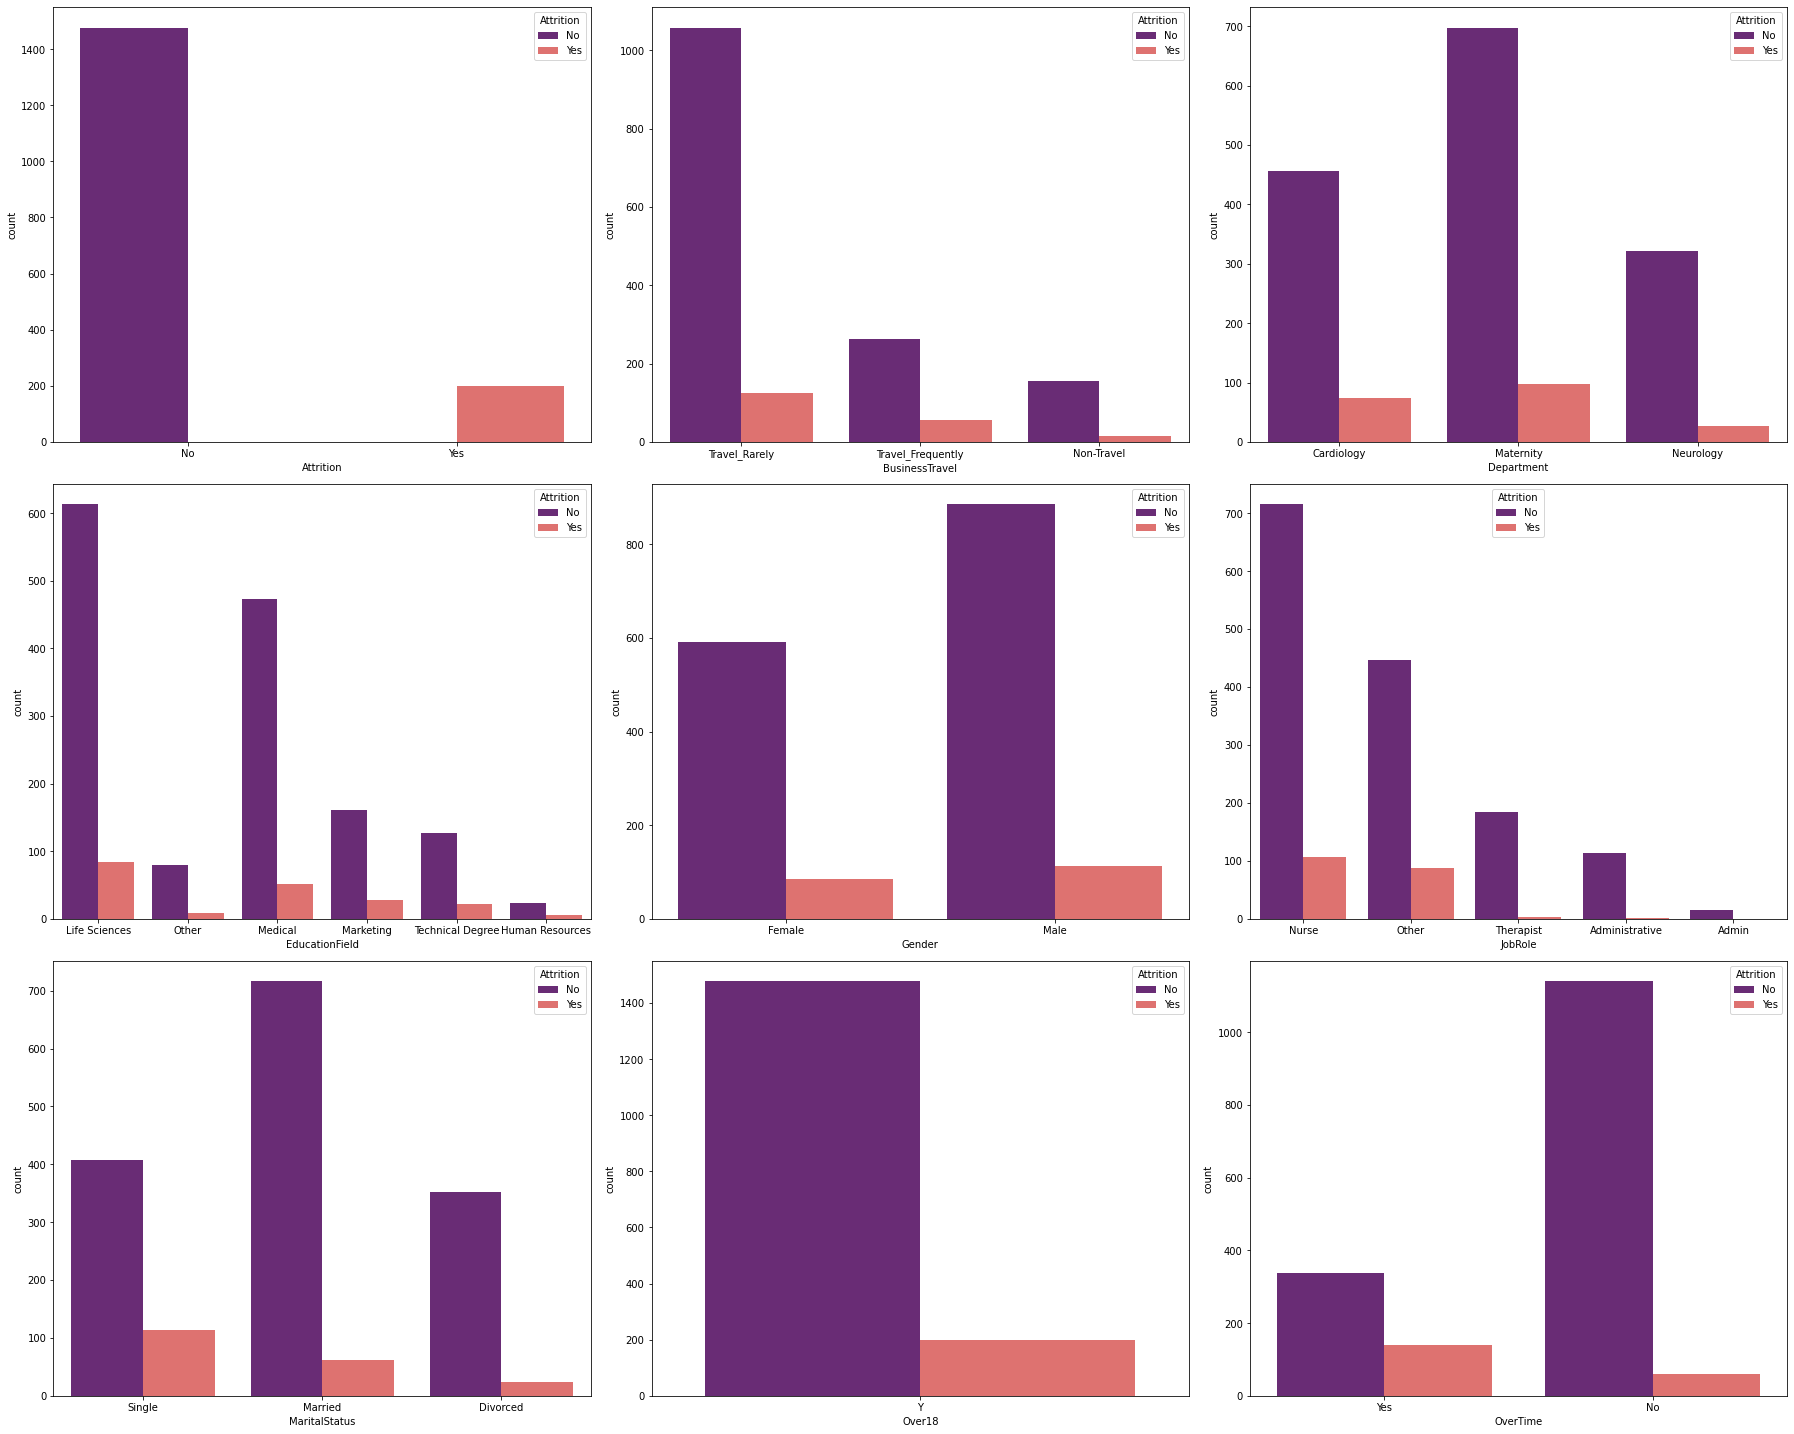

In [21]:
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_col):
    plt.subplot(3,3,index+1)
    sns.countplot(data=cat_col,x=column,hue = cat_col.Attrition,palette="magma")
    
plt.tight_layout(pad = 1.0)
plt.show()

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : We can see that travel_rarely,single,maternity,life Sciences can be attrition easily. Over18 variable is just burden for our data.We do not want process with data that has one value.

In [22]:
df.drop("Over18",axis = 1,inplace = True)

In [23]:
genderAttrition = df[["Attrition","Gender"]]

In [24]:
genderAttrition

,Attrition,Gender
0,No,Female
1,No,Male
2,Yes,Male
3,No,Female
4,No,Male
...,...,...
1671,Yes,Male
1672,No,Female
1673,No,Female
1674,No,Female


In [25]:
NoAttrition = genderAttrition.query('Attrition == "No"')
YesAttrirition = genderAttrition.query('Attrition == "Yes"')
YesAttrirition.Attrition.replace("Yes",1,inplace=True)
YesAttrirition.Gender.replace("Male",0,inplace=True)
YesAttrirition.Gender.replace("Female",1,inplace=True)
NoAttrition.Gender.replace("Male",0,inplace=True)
NoAttrition.Gender.replace("Female",1,inplace=True)
YesAttrirition

,Attrition,Gender
2,1,0
14,1,0
26,1,1
34,1,0
36,1,0
...,...,...
1667,1,0
1668,1,1
1669,1,0
1670,1,1


Text(0.5, 1.0, 'Being Attrition on Gender (0:Male 1:Female)')

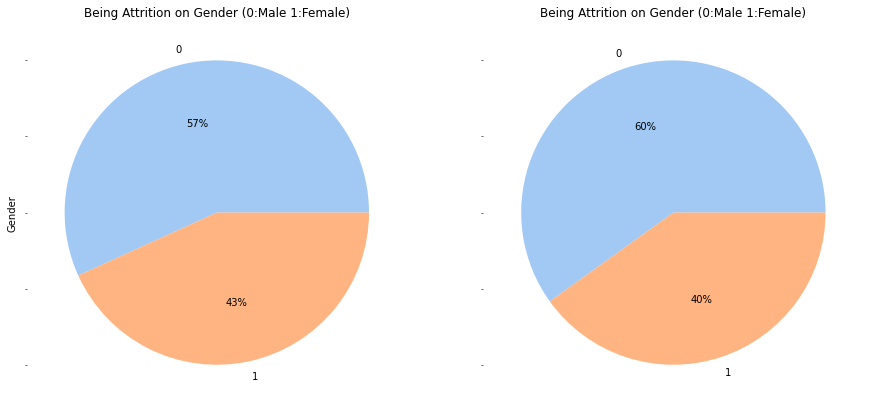

In [26]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

YesAttrirition.Gender.value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Being Attrition on Gender (0:Male 1:Female)")

NoAttrition.Gender.value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("Being Attrition on Gender (0:Male 1:Female)")


<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations :Man's attrition is more than women.Unlike,man's no be attrition is more than women again.We can say that men dominate number of workers in this data.

In [27]:
overTimeAttrition = df[["Attrition","OverTime"]]

In [28]:
NoAttrition = overTimeAttrition.query('Attrition == "No"')
YesAttrirition = overTimeAttrition.query('Attrition == "Yes"')

YesAttrirition.OverTime.replace("No",0,inplace=True)
YesAttrirition.OverTime.replace("Yes",1,inplace=True)

NoAttrition.OverTime.replace("No",0,inplace=True)
NoAttrition.OverTime.replace("Yes",1,inplace=True)


Text(0.5, 1.0, 'Being Attrition on Gender (0:No 1:Yes)')

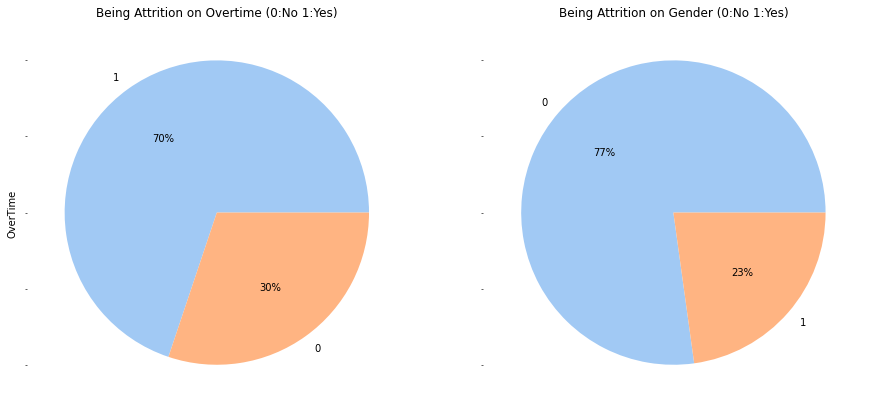

In [29]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

YesAttrirition.OverTime.value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Being Attrition on Overtime (0:No 1:Yes)")

NoAttrition.OverTime.value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("Being Attrition on Gender (0:No 1:Yes)")


<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations :As We can see,Overtime is one of the reason being attrition.In the axes0 we can see overtime's positive includes much more place than not making overtime.

In [30]:
correlation = df.corr()

<AxesSubplot:>

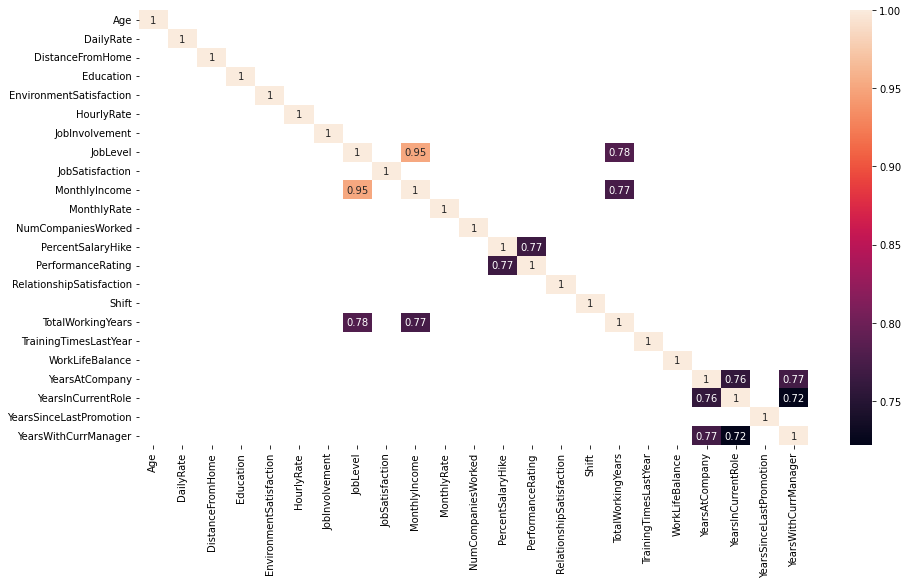

In [31]:
plt.figure(figsize = (15,8))
sns.heatmap(correlation,mask = correlation < 0.7,annot=True)

<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations :There are a lot of correlation.We can drop them for faster calculating.Is there any problem to droping correlation values? No,because value will carry any other one which is correlation each other feature.

In [32]:
df = df.drop(["MonthlyIncome","TotalWorkingYears","PercentSalaryHike","YearsInCurrentRole","YearsWithCurrManager"],axis=1)

In [33]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,24907,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,Male,...,23213,1,Yes,3,2,0,3,1,1,0
1672,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,Female,...,11563,2,Yes,3,3,1,3,3,3,1
1673,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,Female,...,11757,1,No,3,4,0,0,4,1,0
1674,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,Female,...,7060,1,No,3,3,1,3,3,21,11


<h1  style="text-align: center" class="list-group-item list-group-item-action active">5. Data Preprocessing</h1><a id = "5"></a>

In [34]:
X = df.drop("Attrition",axis = 1)
y =  df["Attrition"]

In [35]:
cat_value = X.select_dtypes(exclude=np.number)

In [36]:
X = pd.get_dummies(X,columns=cat_value.columns)

In [37]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,...,0,0,1,0,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,24907,...,0,0,0,1,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,...,0,0,1,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,23159,...,0,0,0,1,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,16632,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,471,24,3,3,66,1,1,4,23213,...,0,0,1,0,0,0,0,1,0,1
1672,46,1125,10,3,3,94,2,3,4,11563,...,0,0,1,0,0,0,1,0,0,1
1673,20,959,1,3,4,83,2,1,2,11757,...,0,0,0,1,0,0,0,1,1,0
1674,39,466,1,1,4,65,2,4,4,7060,...,0,0,0,0,1,0,1,0,1,0


In [38]:
y.replace("No",0,inplace=True)
y.replace("Yes",1,inplace=True)

In [39]:
scaler = StandardScaler()

In [40]:
xColumns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=xColumns)

In [41]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.452933,0.750837,-1.008126,-0.884927,-0.651470,1.412260,0.385287,-0.060036,1.142851,0.727502,...,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,-0.929674,1.486852,-1.587768,1.587768
1,1.329511,-1.299105,-0.149829,-1.860033,0.259935,-0.221278,-1.015454,-0.060036,-0.669276,1.488074,...,-0.098176,-0.271424,-0.981086,1.462387,-0.356513,-0.538724,1.075646,-0.672562,0.629815,-0.629815
2,0.014644,1.425849,-0.885512,-0.884927,1.171341,1.313258,-1.015454,-0.958436,0.236787,-1.666173,...,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,-0.929674,1.486852,-1.587768,1.587768
3,-0.423644,1.473174,-0.762898,1.065286,1.171341,-0.468784,0.385287,-0.958436,0.236787,1.243144,...,-0.098176,-0.271424,-0.981086,1.462387,-0.356513,-0.538724,1.075646,-0.672562,-1.587768,1.587768
4,-1.081078,-0.521970,-0.885512,-1.860033,-1.562875,-1.260803,0.385287,-0.958436,-0.669276,0.328579,...,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,1.075646,-0.672562,0.629815,-0.629815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,-1.190650,-0.820869,1.811993,0.090180,0.259935,0.026227,-2.416195,-0.958436,1.142851,1.250710,...,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,-0.929674,1.486852,-1.587768,1.587768
1672,1.000794,0.808126,0.095399,0.090180,0.259935,1.412260,-1.015454,0.838363,1.142851,-0.381690,...,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,1.075646,-0.672562,-1.587768,1.587768
1673,-1.848083,0.394650,-1.008126,0.090180,1.171341,0.867747,-1.015454,-0.958436,-0.669276,-0.354507,...,-0.098176,-0.271424,-0.981086,1.462387,-0.356513,-0.538724,-0.929674,1.486852,0.629815,-0.629815
1674,0.233789,-0.833323,-1.008126,-1.860033,1.171341,-0.023274,-1.015454,1.736762,1.142851,-1.012652,...,-0.098176,-0.271424,-0.981086,-0.683813,2.804946,-0.538724,1.075646,-0.672562,0.629815,-0.629815


<h4 style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray;"> Observations : We make a standart scaler because our values are close to each other in that case we should use standart scaler.Otherwise,when values are distant each other we use min max.

<h1  style="text-align: center" class="list-group-item list-group-item-action active">6. Models</h1><a id = "6"></a>

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
rd = RandomForestClassifier()

In [45]:
rd.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_pred = rd.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8886679920477137

In [48]:
parameters = {
    "n_estimators" : [50,100,200,400],
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : [1,5,10,None],
    "max_features" : ["sqrt","log2",None]
    
}

In [49]:
rsc = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=parameters,
                         cv = 5,
                         verbose=1,
                         scoring="accuracy"
                        )

In [50]:
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [51]:
print("Best parameters : ",rsc.best_params_)
print("Best scor {:.2f} ".format(rsc.best_score_))

Best parameters :  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'n_estimators': 100}
Best scor 0.93 


<h2 style="color:crimson; font-family:Cursive">Comment your views💡 and thanks for coming soo far and viewing my work </h2>


![](https://i0.wp.com/comicsandmemes.com/wp-content/uploads/blank-meme-template-139-crying-cat-thumbs-up-1.jpg?resize=650,400)
